# Iris Species Classification

## Project Overview

The **Iris dataset** is one of the most famous datasets in the field of machine learning. It was originally used in R.A. Fisher's classic 1936 paper *The Use of Multiple Measurements in Taxonomic Problems*. This dataset contains 150 samples from three different species of Iris flowers: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*, with four features recorded for each sample.

The objective of this project is to build a classification model that predicts the species of an Iris flower based on the given features, using machine learning techniques.

## Objective

The goal of this project is to:

1. Understand and visualize the dataset.
2. Train a classification model to accurately predict the species of Iris flowers based on the four features.
3. Evaluate the performance of different classification models using metrics such as accuracy, precision, recall, and F1-score.

## Dataset Description

The dataset includes the following columns:

- **Id**: Unique identifier for each sample.
- **SepalLengthCm**: Sepal length of the flower in centimeters.
- **SepalWidthCm**: Sepal width of the flower in centimeters.
- **PetalLengthCm**: Petal length of the flower in centimeters.
- **PetalWidthCm**: Petal width of the flower in centimeters.
- **Species**: The species of the flower (*Iris-setosa*, *Iris-versicolor*, or *Iris-virginica*).

### Summary:

- **Number of Observations**: 150
- **Number of Features**: 5 (4 features + 1 target variable)

### Problem Statement

- **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data and find the hidden patterns present in the dataset so that we can find most significant features to predict the class of Iris species.
- **Data Cleaning**: Clean the data by removing unnecessary features, removing or imputing missing values, removing outliers and duplicate observations present in the dataset so that it is easier for the ML model to learn the pattern.



### Load Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
from sklearn.preprocessing import LabelEncoder

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "Iris.csv")

### Load Data

In [29]:
df = pd.read_csv(csv_path)

In [30]:
# Show 1st 5 rows to get an idea about the data stored in each feature
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Anslysis(EDA)

In [31]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 150
Number of features: 6


In [32]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
unique_cols = [ col for col in df.columns if df[col].nunique() == df.shape[0]]
print(f"Number of features containing unique values: {len(unique_cols)}")
print(unique_cols)

FEATURE DESCRIPTION
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
------------------------------------------------------------
Number of features containing unique values: 1
['Id']


### Key Findings

- Except the target variable(**Species**) all **5** features are numeric.
- **Id** feature contains unique values for each observations. This is not helpful for finding patterns in the data for a machine learning model. So, This feature should be removed.

In [33]:
# Missing or Null Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature")

MISSING VALUE DETECTION
No missing value present in any feature


In [34]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate observations: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate observations: 0


In [35]:
# Statistical Information
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


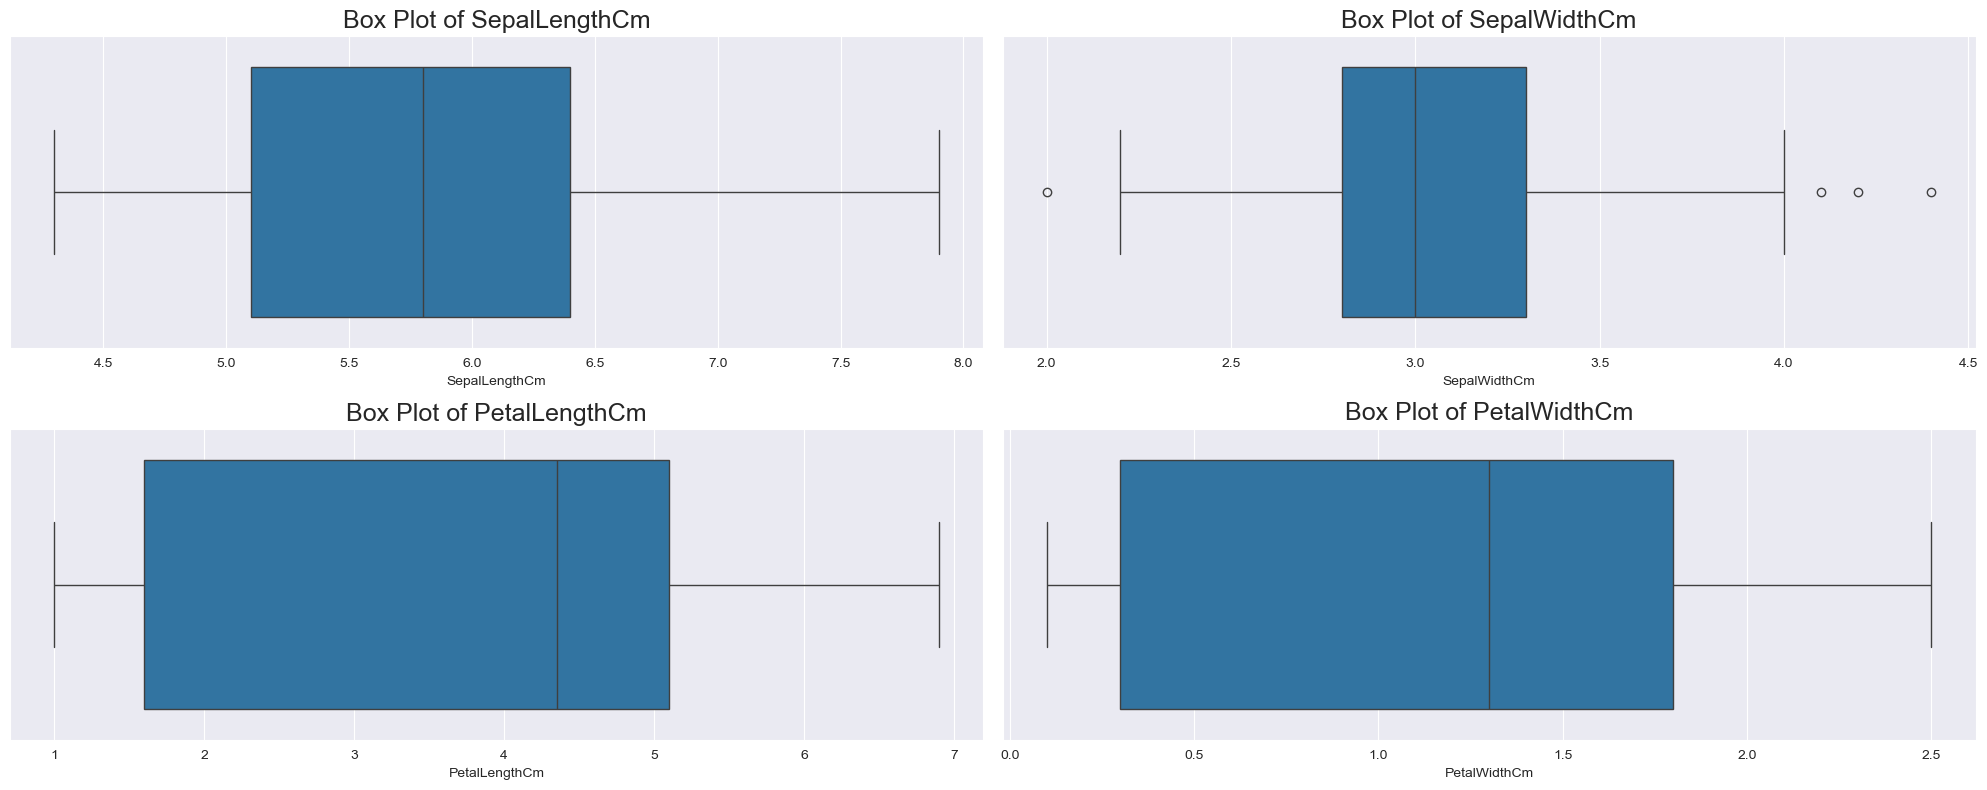

In [36]:
# Outlier Detection with Box Plot

num_cols = [ col for col in df.columns if df[col].dtype == "float64"]

fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f"Box Plot of {col}", fontsize= 18)
plt.tight_layout()
plt.show()

### Key Findings

- **SepalWidthCm** has few values present outside range of lower and upper extreme. Those are **outliers** for this data. 

### Target Analysis(Understanding the Species Dstribution)

Analyze the distribution of target variable(Species)

Species Analysis
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Text(0.5, 1.0, 'Target Analysis')

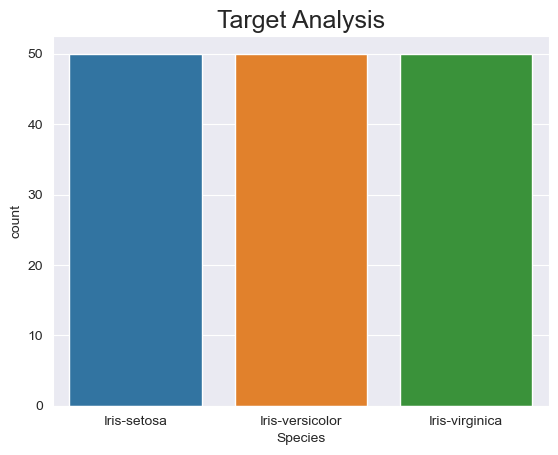

In [37]:
# Count the each species
print("=" * 60)
print("Species Analysis")
print("=" * 60)
print(df["Species"].value_counts())

# Visualize Species Distribution
sns.countplot(data=df, x= "Species", hue= "Species")
plt.title("Target Analysis", fontsize= 18)

### Key Findings

- All 3 species of Iris flower has equal(**50**) number of observations.
- So This is a **Balanced** dataaet.

### Sepal Length Analysis( Effect of Sepal Length in classification of Iris Species)

Analyze how variation in Sepal Length affects the classification of species.

Text(0.5, 1.0, 'Sepal Length Vs. Species')

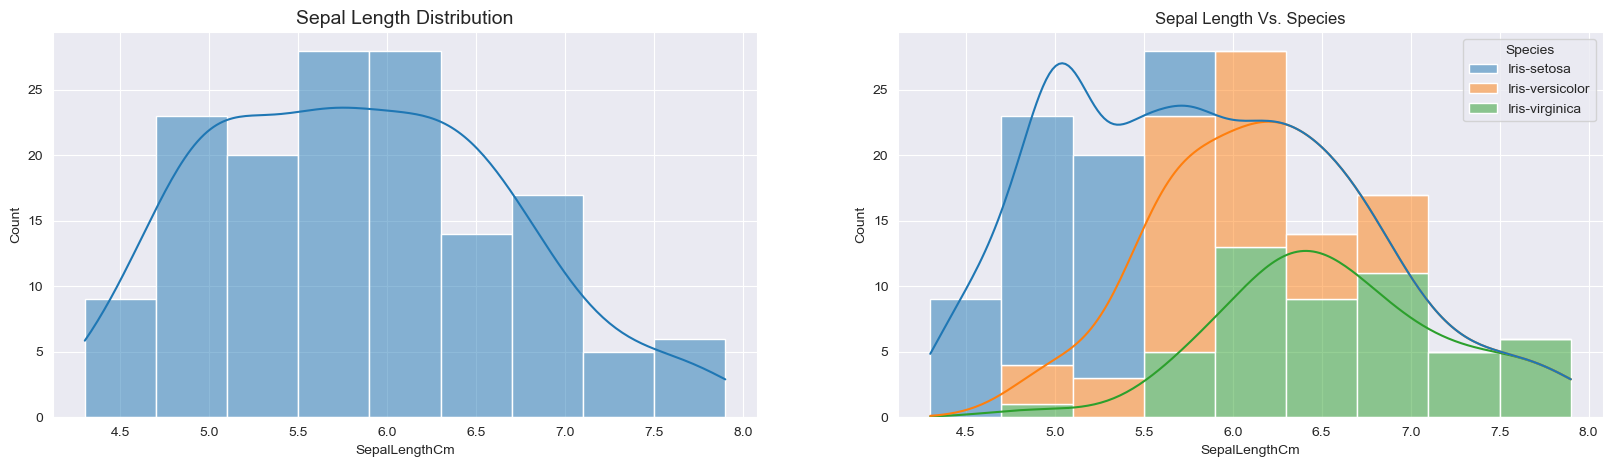

In [38]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20, 5))

# Sepal Length Distribution
sns.histplot(data= df, x= "SepalLengthCm", kde= True, ax= axes[0])
axes[0].set_title("Sepal Length Distribution", fontsize= 14)

# Sepal Length Vs. Species
sns.histplot(data=df, x= "SepalLengthCm", hue="Species", kde= True, multiple= "stack", ax= axes[1])
axes[1].set_title("Sepal Length Vs. Species")

### Key Findings

- Sepal Length of **Iris-Setosa** is the **lowest** among 3 species.
-  **Iris-Verginica** has the **highest** Sepal Length among 3 species.

### Sepal Width Analysis(Impact of Sepal Witdth in Classification of Isis Species)

Analyze the variation of sepal width and find how it affects the classification 

Text(0.5, 1.0, 'Sepal Width Vs. Species')

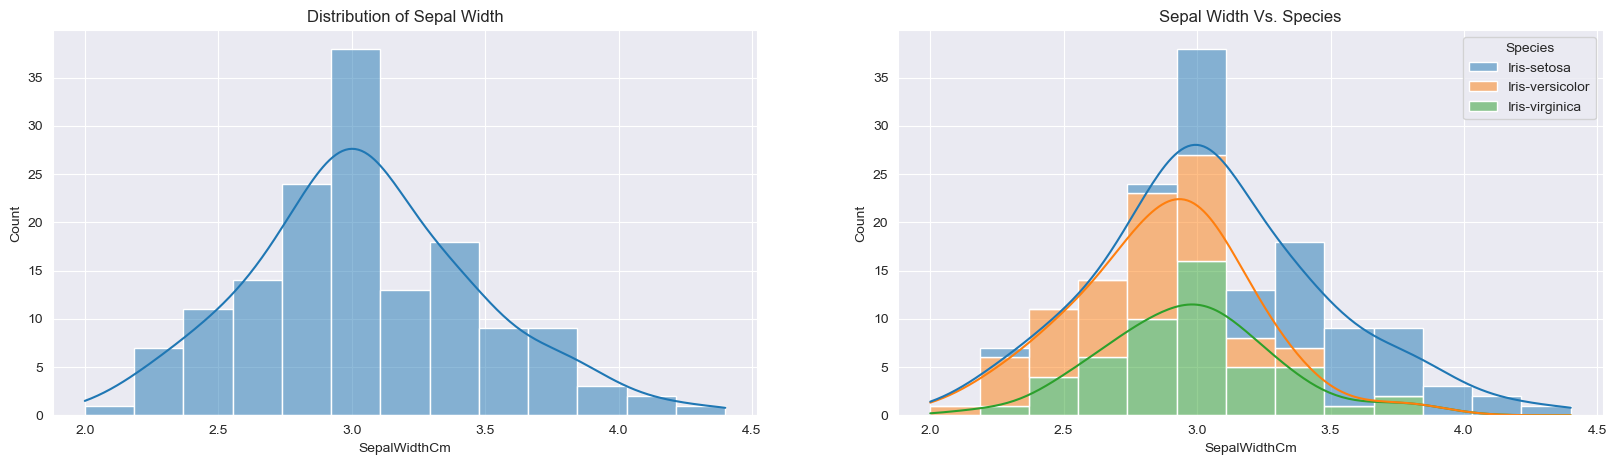

In [39]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,5))

# Sepal Width Distribution
sns.histplot(data= df, x= "SepalWidthCm", kde= True, ax= axes[0])
axes[0].set_title("Distribution of Sepal Width")

# Sepal Width Vs. Spelies
sns.histplot(df, x= "SepalWidthCm", hue= "Species", kde= True, multiple= "stack", ax= axes[1])
axes[1].set_title("Sepal Width Vs. Species")

### Key Findings

- Sepal width of **Iris-Setosa** is higher than the other 2 splecies.

### Petal Length Analysis(Effect of Petal Length in classification of Iris Species)

Analyze how variation of petal length affects the the classification of scecies

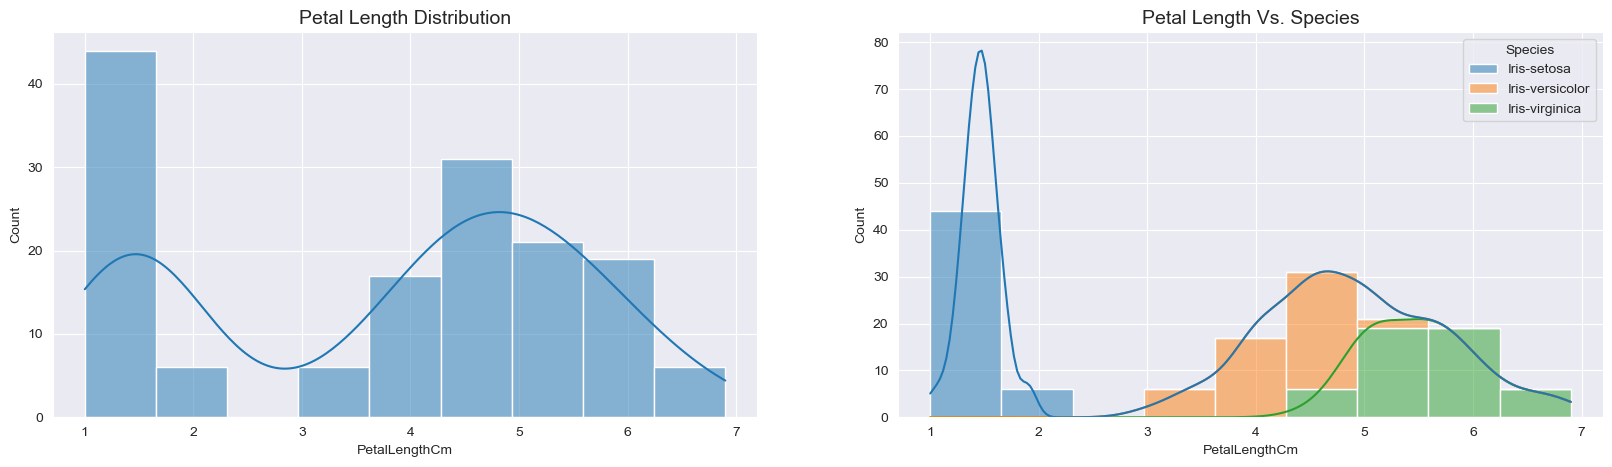

In [40]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (20,5))

# Petal Length Distribution
sns.histplot(data= df, x= "PetalLengthCm", kde= True, ax= axes[0])
axes[0].set_title("Petal Length Distribution", fontsize= 14)
# Petal Length Vs. Species
sns.histplot(data= df, x= "PetalLengthCm", hue= "Species", kde= True, multiple= "stack", ax= axes[1])
axes[1].set_title("Petal Length Vs. Species", fontsize=14)
plt.show()

### Key Findings

- Petal length of **Iris-Seosa** is very low compared to other 2 species. This indicates that if the petal length is within **2cm** that species has fare chance of classified as **Iris-Setosa**.
- **Iris-verginica** has the higher petal length between other 2 species. This indicates that if the petal length is above **6cm** that species has fare chance of classified as **Iris-verginica**.

### Petal Width Analysis(Effect of Petal Width in Classification of Iris Species)

Analyze how variation of petal width affects the classification of species.

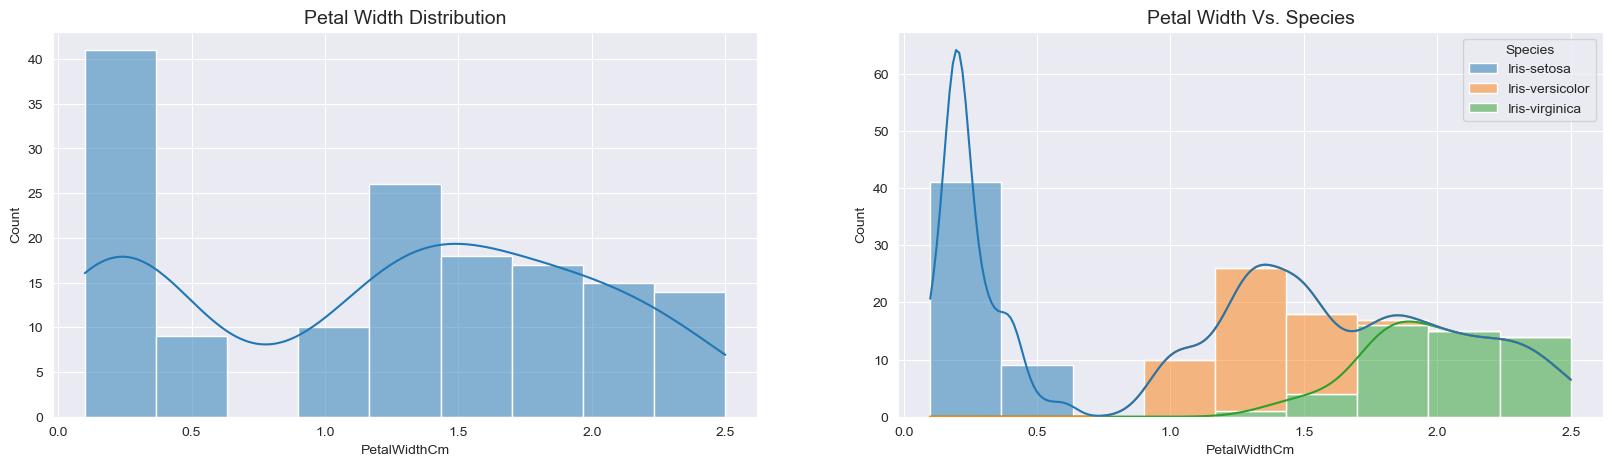

In [41]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (20, 5))

# Petal Width Distribution
sns.histplot(data= df, x= "PetalWidthCm", kde= 1, ax= axes[0])
axes[0].set_title("Petal Width Distribution", fontsize= 14)
# Petal Width Vs. Species
sns.histplot(data= df, x= "PetalWidthCm", hue= "Species", kde= True, multiple= "stack", ax= axes[1])
axes[1].set_title("Petal Width Vs. Species", fontsize=14)
plt.show()

### Key Findings

- Petal width of **Iris-Seosa** is very low compared to other 2 species. This indicates that if the petal length is within **0.5cm** that species has fare chance of classified as **Iris-Setosa**.
- **Iris-verginica** has the higher petal length between other 2 species. This indicates that if the petal length is above **2cm** that species has fare chance of classified as **Iris-verginica**.

### Length (Sepal and Petal) Analysis

Analyze the effect of variation in both sepal and petal length in classification of species.

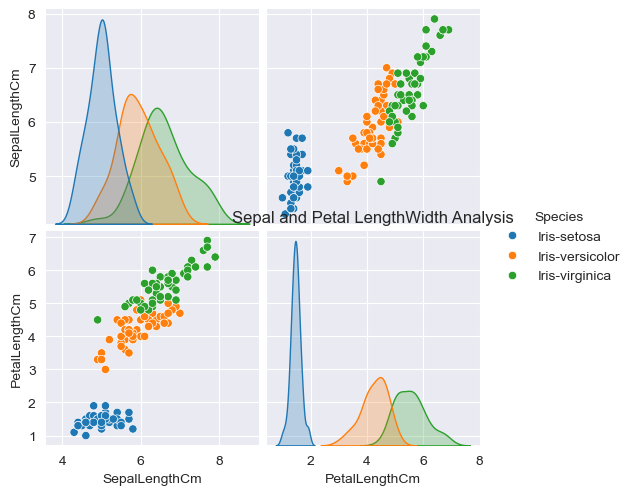

In [42]:
sns.pairplot(df, hue='Species', diag_kind='kde', vars=['SepalLengthCm', 'PetalLengthCm'])
plt.title("Sepal and Petal LengthWidth Analysis")
plt.show()

### Key Findings

- Sepal Length and Petal Length has positive correlation.
- **Iris-Setosa** has the lowest sepal and petal length compared to other 2 species.

### Width (Sepal & Petal) Analysis

Analyze how sepal & petal width affects the classification of species.

<Figure size 800x800 with 0 Axes>

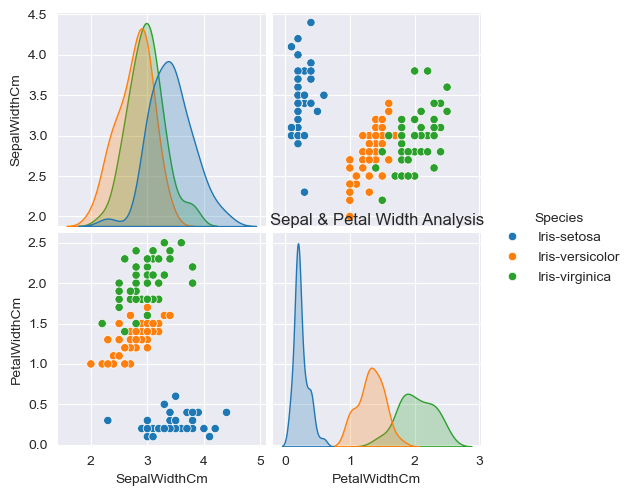

In [43]:
plt.figure(figsize= (8, 8))
sns.pairplot(data=df, hue="Species", diag_kind= "kde", vars= ["SepalWidthCm", "PetalWidthCm"])
plt.title("Sepal & Petal Width Analysis")
plt.show()

### Key Findings

- Sepal and Petal width are significantly lower in **Iris-Setosa** species compared to other 2 specis.
- Sepal and Petal width are medium in **Iris-versicolor** species.
- Sepal and Petal width are high in **Iris-verginica** species.

### Data Cleaning

In [44]:
# Remove unnecessary features

# Here Id contains unique value for each species, so this feature is not help us to find pattern in the data for
# the machine learing model.
df.drop("Id", axis= 1, inplace= True)
# Sanity check
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Feature Encoding

In [46]:
# Encode the target feature Species using Label Encoding to encode the categorical data to numerric.

# Define label encoder
encoder = LabelEncoder()
# Encode
df["Species"] = encoder.fit_transform(df["Species"])

# Sanity check
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
# Check Encoded target values
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

### Correlation Analysis

In [48]:
# Find the linear correlation among the features
corr = df.corr().round(2)
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.00,-0.11,0.87,0.82,0.78
SepalWidthCm,-0.11,1.00,-0.42,-0.36,-0.42
PetalLengthCm,0.87,-0.42,1.00,0.96,0.95
PetalWidthCm,0.82,-0.36,0.96,1.00,0.96
Species,0.78,-0.42,0.95,0.96,1.00


<Axes: >

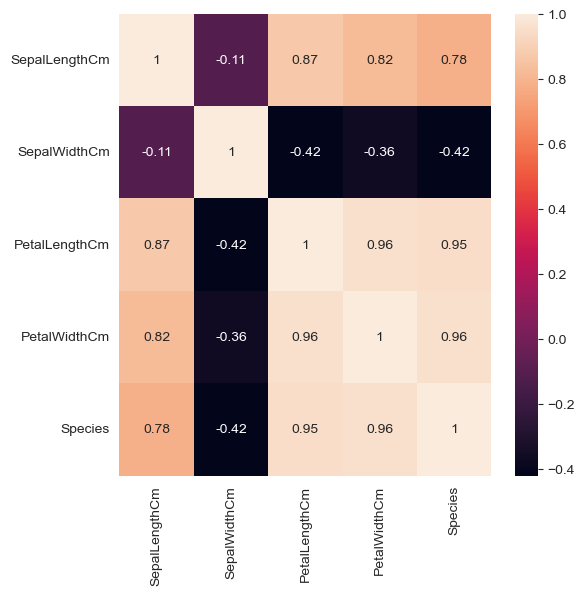

In [49]:
# Visualize the correlation with heatmap
plt.figure(figsize= (6, 6))
sns.heatmap(corr, annot= True)

### Key Findings

- Sepal Length, Petal Length and Petal Width have strong positive correlation with the target feature Species and Sepal Width have moderate negetive correlation with Species.
- Sepal Length has strong positive correlation with Petal Length and Petal Width.
- Petal Length has strong positive correlation with Petal Width.

### Save the Cleaned and Encoded Data

In [50]:
# Save the cleaned data to use in model training
cleaned_path = os.path.join(data_path, "Iris_cleaned.csv")
df.to_csv(cleaned_path, index= False)